<a href="https://colab.research.google.com/github/Tor-Storli/COLAB_DEMOS/blob/master/Testing_X_Ray_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.widgets import *
import torch

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

data_root='/content/drive/My Drive/x_ray'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = Path('/content/drive/My Drive/x_ray/train')
test_path = Path('/content/drive/My Drive/x_ray/test/')
classes = ['normal','pneumonia']

### Run Prediction on CPU not GPU

In [0]:
defaults.device = torch.device('cpu')

#### load the 'export.pkl' file from the 'x_ray' train folder containing the final model data

In [0]:
learn = load_learner(path)

### The exported model contains a lot of information pertaining to the model

In [0]:
learn

In [0]:
learn.data.classes

['normal', 'pneumonia']

In [0]:
def get_labels():
  label_0, label_1 = learn.data.classes
  return  learn.data.classes[0], learn.data.classes[1]

In [0]:
x,y = get_labels()
print(x)
print(y)

normal
pneumonia


In [0]:
def xray_classifier(img_path, actual_class):
    img = open_image(img_path)
    pred_class,labels,probability = learn.predict(img)
  #  print(type(label))
    probs = probability.data.tolist()
    label = labels.item()
   # prob1 = probability.data[1]
    img.show(title=str(pred_class),figsize=(6, 4))
    print('random image: ',img_path)
    print('========================')
    print('labels: 0-' + learn.data.classes[0],' <=> ','1-' + learn.data.classes[1])
    print('label: ', label)
    print('Actual:     ',actual_class)
    print('Predicted:  ', str(pred_class))
    print('Probability - label 0: {0:.5f}'.format(round(probs[0],5)))
    print('Probability - label 1: {0:.5f}'.format(round(probs[1],5)))
    print('========================')

random image:  /content/drive/My Drive/x_ray/test/pneumonia/person78_bacteria_385.jpeg
labels: 0-normal  <=>  1-pneumonia
label:  1
Actual:      pneumonia
Predicted:   pneumonia
Probability - label 0: 0.00013
Probability - label 1: 0.99987


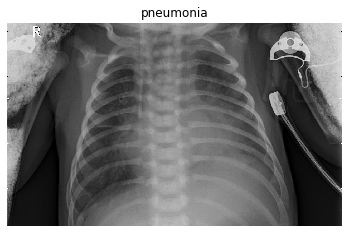

In [0]:
rand_fol = random.choice([x for x in classes]) 
rand_folder = test_path/rand_fol  
rand_img = random.choice([x for x in os.listdir(rand_folder)])
rand_path = rand_folder/rand_img                        
actual_class = rand_fol
#Classify image
xray_classifier(rand_path, actual_class)
#

In [0]:
doc(learn.predict)

### END OF MODULE  